<a href="https://colab.research.google.com/github/StivenSilva22/Datos-abiertos/blob/main/SCSL_PPAD_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Central**

![UC](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)

# **Maestría en Analítica de Datos**
## *Programación Para La Analítica de Datos*
## **Profesor**: Nicolás Guillermo Avilán Vargas, Ph.D.
## **Estudiante**: Stiven Leonardo Silva Castillo

# **Tarea 2**

# **PARTE I**

Seleccione un DataFrame de acceso público que tenga un tamaño superior a $5$MB.

– Cada estudiante debe elegir un conjunto de datos diferente.

– Cada estudiante debe registrar el DataFrame seleccionado en el archivo DataFrames
Tarea $2$.

– El archivo debe contener variables tanto numéricas como categóricas y una columna
con texto.

## Descripción del conjunto de datos

La base de datos que escogí es a un conjunto de datos del sistema **SECOP II** que contiene información sobre contratos gubernamentales electrónicos en Colombia. La información se presenta en forma de tabla y está organizada en varias columnas que incluyen: 

- Número de proceso: un identificador único para cada contrato.
- Entidad compradora: el nombre de la entidad gubernamental que realizó el contrato.
- NIT de la entidad compradora: el número de identificación tributaria de la entidad gubernamental.
- Tipo de procedimiento: el tipo de procedimiento utilizado para realizar la contratación.
- Estado del proceso: el estado actual del proceso de contratación.
- Objeto del contrato: una breve descripción del objeto del contrato.
- Detalle del objeto a contratar: información adicional sobre el objeto del contrato.
- Fecha de inicio del contrato: la fecha en que se inició el contrato.
- Fecha de fin del contrato: la fecha en que se finalizó el contrato.
- Cuantía a contratar: el valor total del contrato.
- Valor total de adiciones: el valor total de las adiciones realizadas al contrato.
- Valor pagado a la fecha: el valor total pagado hasta la fecha por el contrato.
- entre muchas otras ...

Estos datos pueden ser utilizados para realizar análisis y evaluaciones de las contrataciones gubernamentales electrónicas en Colombia, y para identificar patrones y tendencias en la ejecución de estos contratos.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [47]:
url = 'https://raw.githubusercontent.com/StivenSilva22/Datos-abiertos/main/SECOP_II_-_Contratos_Electr_nicos%20(4).csv'
df = pd.read_csv(url, low_memory=False)

In [48]:
df

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Fecha Inicio Liquidacion,Fecha Fin Liquidacion,Codigo Proveedor,Objeto del Contrato
0,MUNICIPIO DE CARTAGO,"891,900,493",Valle del Cauca,Cartago,"Colombia, Valle del Cauca , Cartago",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.4333130,...,0,"650,000",0,0,04/25/2023 12:00:00 AM,704960004,NaN,NaN,716907704.0,Prestar los servicios como Monitor de Fútbol d...
1,DIRECCION DE TRANSITO DE BUCARAMANGA,"890,204,109",Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Territorial,Transporte,Ejecutivo,Descentralizada,CO1.BDOS.4283671,...,0,"5,020,610",0,0,04/27/2023 12:00:00 AM,700712011,2023-12-04 17:00:00,2024-04-04 17:00:00,700636053.0,SUMINISTRO DE CERTIFICADOS DIGITALES PARA INTE...
2,SENA REGIONAL CAQUETA,"899,999,034",Caquetá,No Definido,"Colombia, Caquetá",Nacional,Trabajo,Ejecutivo,Descentralizada,CO1.BDOS.4332033,...,0,"49,804,749",0,0,04/26/2023 12:00:00 AM,704160886,2024-01-01 13:00:00,2024-05-01 04:59:00,703545509.0,Prestar servicios profesionales para la gestió...
3,MUNICIPIO DE SOACHA,"800,094,755",Cundinamarca,Soacha,"Colombia, Cundinamarca , Soacha",Territorial,"Vivienda, Ciudad y Territorio",Ejecutivo,Descentralizada,CO1.BDOS.4312653,...,0,0,0,"10,800,000",04/25/2023 12:00:00 AM,702158254,NaN,NaN,715471561.0,PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
4,ESE CLINICA MATERNIDAD RAFAEL CALVO C,"806,001,061",Bolívar,Cartagena,"Colombia, Bolívar , Cartagena",Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,CO1.BDOS.4318518,...,0,"3,427,200",0,0,04/26/2023 12:00:00 AM,704441476,NaN,NaN,721321339.0,SUMINISTRO DE DISPENSADOR DE AGUA PLANTA DE OZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN RAFAEL ...,"899,999,151",Cundinamarca,Facatativá,"Colombia, Cundinamarca , Facatativá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.4348873,...,0,"11,310,000",0,0,05/01/2023 12:00:00 AM,703019919,NaN,NaN,721730463.0,PRESTACIÓN DE SERVICIOS DE AUXILIAR ADMINISTRA...
9365,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN JUAN DE...,"890,501,019",Norte de Santander,Pamplona,"Colombia, Norte de Santander , Pamplona",Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,CO1.BDOS.4314445,...,0,0,0,"239,960,000",05/01/2023 12:00:00 AM,700733116,NaN,NaN,717930010.0,PRESTACIÓN DE SERVICIOS DE FACTURACION REVISOR...
9366,DEFENSORÍA DEL PUEBLO,"800,186,061",Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Corporación Autónoma,Centralizada,CO1.BDOS.4352990,...,0,0,0,0,05/01/2023 12:00:00 AM,702541384,NaN,NaN,708721543.0,Prestación de servicios profesionales para bri...
9367,DEFENSORÍA DEL PUEBLO,"800,186,061",Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Corporación Autónoma,Centralizada,CO1.BDOS.4353601,...,0,0,0,0,05/01/2023 12:00:00 AM,702541384,NaN,NaN,710000407.0,Prestación de servicios profesionales para bri...


Cambiamos todas las letras a mayúsculas, con lo que en el siguiente código utiliza la función `apply()` para aplicar una función `lambda` a cada elemento de las columnas del" `df`". 

La función `lambda` comprueba si el elemento es una cadena de caracteres (con la función `isinstance()`), y si es así, convierte la cadena a mayúsculas con el método `upper()`. 

Si el elemento no es una cadena de caracteres (por ejemplo, si es un valor nulo o un valor numérico), se devuelve tal cual sin modificar.


In [49]:
for i in df.columns:
  df[i] = df[i].apply(lambda x: x.upper() if isinstance(x, str) else x)

In [50]:
df['Nit Entidad']

0       891,900,493
1       890,204,109
2       899,999,034
3       800,094,755
4       806,001,061
           ...     
9364    899,999,151
9365    890,501,019
9366    800,186,061
9367    800,186,061
9368    800,186,061
Name: Nit Entidad, Length: 9369, dtype: object

In [51]:
df.Sector

0              NO APLICA/NO PERTENECE
1                          TRANSPORTE
2                             TRABAJO
3       VIVIENDA, CIUDAD Y TERRITORIO
4           SALUD Y PROTECCIÓN SOCIAL
                    ...              
9364        SALUD Y PROTECCIÓN SOCIAL
9365        SALUD Y PROTECCIÓN SOCIAL
9366                 SERVICIO PÚBLICO
9367                 SERVICIO PÚBLICO
9368                 SERVICIO PÚBLICO
Name: Sector, Length: 9369, dtype: object

In [52]:
df['ID Contrato']

0       CO1.PCCNTR.4898280
1       CO1.PCCNTR.4896148
2       CO1.PCCNTR.4897445
3       CO1.PCCNTR.4886798
4       CO1.PCCNTR.4886740
               ...        
9364    CO1.PCCNTR.4910131
9365    CO1.PCCNTR.4910643
9366    CO1.PCCNTR.4914216
9367    CO1.PCCNTR.4914240
9368    CO1.PCCNTR.4914237
Name: ID Contrato, Length: 9369, dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Nombre Entidad                                                      9369 non-null   object 
 1   Nit Entidad                                                         9369 non-null   object 
 2   Departamento                                                        9369 non-null   object 
 3   Ciudad                                                              9369 non-null   object 
 4   Localización                                                        9369 non-null   object 
 5   Orden                                                               9369 non-null   object 
 6   Sector                                                              9369 non-null   object 
 7   Rama           

# **PARTE II**

Hacer un cuaderno en Colab en el que lea y procese los datos originales. El proceso debe
incluir las siguientes actividades:

1. Reconocimiento del DataFrame. Tamaño, naturaleza de los datos, nombre de columnas, formato de los datos, etc.

2. Asegurar que las variables numéricas estén en el formato correcto.

3. Reconocimiento y limpieza de los datos faltantes. Estimación del porcentaje de datos
eliminados.

4. Calcular alguna cantidad de interés en una nueva columna.

5. Genere nuevos DataFrames agrupando datos según características de interés, tango
usando `.groupby()` como filtros. Una dos de los DataFrames generados por filtro y
agrupamiento, inteprete cuidadosamente los datos obtenidos.

6. Graficar variables numéricas matizando seg´un variables categóricas (hue).

7. Construir tablas pivote y hacer gráficas de calor de las mismas.

8. Hacer al menos dos gráficas con datos categóricos.

9. Graficar y analizar la correlación de las variables numéricas del DataSet.

10. Use expresiones regulares (`ˆ, .* , $`, etc. ) para filtrar dependiendo contenidos de
texto y grafique los resultados obtenidos.

## **Actividad 1**

### Tamaño  y naturaleza de los datos

Se utiliza el método `memory_usage()` de pandas para obtener el tamaño en bytes del dataframe:

In [54]:
print(df.memory_usage(index=True).sum())

5321720


El parámetro `index=True` indica que se debe incluir el tamaño en `bytes` del índice del dataframe. El resultado de `memory_usage()` es una Serie de pandas que contiene el tamaño en `bytes` de cada columna y el índice, por lo que se usa el método `sum()` para calcular la suma total de los tamaños en `bytes`.

Ahora bien, para convertir un tamaño de bytes a `KB`, `MB` o `GB`, se puede dividir el tamaño en bytes por 1024 para obtener `KB`, dividir por $1024^2$ (o $1,048,576$) para obtener `MB`, o dividir por $1024^3$ (o $1,073,741,824$)  para obtener `GB`.



In [55]:
print(df.memory_usage().sum() /(1024**2), "MB") 

5.075187683105469 MB


### **Nombre de las columnas** 

De las columnas que aparecen en este Dataframe, extraeremos aquellas que a simple vista, parecen ser columnas numericas: 

In [56]:
df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Val

## **Actividad 2**

Conversión de algunas variables numéricas

### **Tratamiento de algunos tipos de datos** 

Puesto que esta base de datos fue extraida de la página directamente de seguro encontraremos en ella valores que pueden tener caracteres especiales (como comas o puntos) que impitan su conversión directamente a numérico u otros tratamientos si son categóricas dichas variables


In [57]:
# 3 variables
dfint=['Nit Entidad',
       'Sistema General de Participaciones', 
       'Sistema General de Regalías'
       ]

for i in dfint:
   df[i] = df[i].str.replace(',','').astype(int)

In [58]:
df['Nit Entidad']

0       891900493
1       890204109
2       899999034
3       800094755
4       806001061
          ...    
9364    899999151
9365    890501019
9366    800186061
9367    800186061
9368    800186061
Name: Nit Entidad, Length: 9369, dtype: int64

In [59]:
# 10 Variables
dfnumeric=['Valor del Contrato', 
           'Valor de pago adelantado', 
           'Valor Facturado',
           'Valor Pendiente de Pago', 
           'Valor Pagado', 
           'Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)', 
           'Recursos Propios', 
           'Presupuesto General de la Nacion – PGN',
           'Valor Pendiente de Ejecucion',
           'Saldo CDP' 
           ]

Para aquellas que tengan comas `,` procedemos a convertirlas a numericas según el siguiente `for`

In [60]:
for i in dfnumeric:
  df[i] = df[i].str.replace(',', '')             # Cambia las comas a sin espacio
  df[i] = df[i].astype(float)                    # Convierte los valores que estan almacenados en str a float
  df[i] = pd.to_numeric(df[i], 
                        errors='coerce')         # si algún valor no se puede convertir a numérico, se asigna el 
                                                 # valor NaN en lugar de generar un error mediante el parámetro 
                                                 # errors='coerce' de la función pd.to_numeric().

In [61]:
df['Valor del Contrato']

0        16150000.0
1         5020610.0
2        49804749.0
3        10800000.0
4         3427200.0
           ...     
9364     11310000.0
9365    239960000.0
9366    105000000.0
9367     96000000.0
9368     96000000.0
Name: Valor del Contrato, Length: 9369, dtype: float64

In [62]:
df

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Fecha Inicio Liquidacion,Fecha Fin Liquidacion,Codigo Proveedor,Objeto del Contrato
0,MUNICIPIO DE CARTAGO,891900493,VALLE DEL CAUCA,CARTAGO,"COLOMBIA, VALLE DEL CAUCA , CARTAGO",TERRITORIAL,NO APLICA/NO PERTENECE,EJECUTIVO,CENTRALIZADA,CO1.BDOS.4333130,...,0,650000.0,0,0.0,04/25/2023 12:00:00 AM,704960004,NaN,NaN,716907704.0,PRESTAR LOS SERVICIOS COMO MONITOR DE FÚTBOL D...
1,DIRECCION DE TRANSITO DE BUCARAMANGA,890204109,SANTANDER,BUCARAMANGA,"COLOMBIA, SANTANDER , BUCARAMANGA",TERRITORIAL,TRANSPORTE,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4283671,...,0,5020610.0,0,0.0,04/27/2023 12:00:00 AM,700712011,2023-12-04 17:00:00,2024-04-04 17:00:00,700636053.0,SUMINISTRO DE CERTIFICADOS DIGITALES PARA INTE...
2,SENA REGIONAL CAQUETA,899999034,CAQUETÁ,NO DEFINIDO,"COLOMBIA, CAQUETÁ",NACIONAL,TRABAJO,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4332033,...,0,49804749.0,0,0.0,04/26/2023 12:00:00 AM,704160886,2024-01-01 13:00:00,2024-05-01 04:59:00,703545509.0,PRESTAR SERVICIOS PROFESIONALES PARA LA GESTIÓ...
3,MUNICIPIO DE SOACHA,800094755,CUNDINAMARCA,SOACHA,"COLOMBIA, CUNDINAMARCA , SOACHA",TERRITORIAL,"VIVIENDA, CIUDAD Y TERRITORIO",EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4312653,...,0,0.0,0,10800000.0,04/25/2023 12:00:00 AM,702158254,NaN,NaN,715471561.0,PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
4,ESE CLINICA MATERNIDAD RAFAEL CALVO C,806001061,BOLÍVAR,CARTAGENA,"COLOMBIA, BOLÍVAR , CARTAGENA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4318518,...,0,3427200.0,0,0.0,04/26/2023 12:00:00 AM,704441476,NaN,NaN,721321339.0,SUMINISTRO DE DISPENSADOR DE AGUA PLANTA DE OZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN RAFAEL ...,899999151,CUNDINAMARCA,FACATATIVÁ,"COLOMBIA, CUNDINAMARCA , FACATATIVÁ",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4348873,...,0,11310000.0,0,0.0,05/01/2023 12:00:00 AM,703019919,NaN,NaN,721730463.0,PRESTACIÓN DE SERVICIOS DE AUXILIAR ADMINISTRA...
9365,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN JUAN DE...,890501019,NORTE DE SANTANDER,PAMPLONA,"COLOMBIA, NORTE DE SANTANDER , PAMPLONA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4314445,...,0,0.0,0,239960000.0,05/01/2023 12:00:00 AM,700733116,NaN,NaN,717930010.0,PRESTACIÓN DE SERVICIOS DE FACTURACION REVISOR...
9366,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4352990,...,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,NaN,NaN,708721543.0,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9367,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4353601,...,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,NaN,NaN,710000407.0,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...


### **Ejemplo de una variable numérica de este DataSet**

In [63]:
df['Presupuesto General de la Nacion – PGN']

0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
           ...     
9364            0.0
9365            0.0
9366    105000000.0
9367     96000000.0
9368     96000000.0
Name: Presupuesto General de la Nacion – PGN, Length: 9369, dtype: float64

### **Ejemplo de una variable categórica de este DataSet**

In [64]:
df['Es Pyme']

0       NO
1       NO
2       NO
3       NO
4       NO
        ..
9364    NO
9365    SI
9366    NO
9367    NO
9368    NO
Name: Es Pyme, Length: 9369, dtype: object

### **Ejemplo de una variable fecha de este DataSet**

In [65]:
dfdate=['Fecha de Firma', 
        'Fecha de Inicio del Contrato',
        'Fecha de Fin del Contrato', 
        'Fecha de Inicio de Ejecucion',
        'Fecha de Fin de Ejecucion', 
        'Fecha Inicio Liquidacion', 
        'Fecha Fin Liquidacion']
# Convertir la columna 'fecha_str' a tipo datetime
for i in dfdate:
  df[i] = pd.to_datetime(df[i])

In [66]:
df['Fecha de Firma']

0      2023-04-25
1      2023-04-25
2      2023-04-25
3      2023-04-25
4      2023-04-25
          ...    
9364   2023-04-30
9365   2023-04-30
9366   2023-04-30
9367   2023-04-30
9368   2023-04-30
Name: Fecha de Firma, Length: 9369, dtype: datetime64[ns]

### **Ejemplo de una variable con texto de este DataSet**






In [67]:
df['Objeto del Contrato']

0       PRESTAR LOS SERVICIOS COMO MONITOR DE FÚTBOL D...
1       SUMINISTRO DE CERTIFICADOS DIGITALES PARA INTE...
2       PRESTAR SERVICIOS PROFESIONALES PARA LA GESTIÓ...
3       PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
4       SUMINISTRO DE DISPENSADOR DE AGUA PLANTA DE OZ...
                              ...                        
9364    PRESTACIÓN DE SERVICIOS DE AUXILIAR ADMINISTRA...
9365    PRESTACIÓN DE SERVICIOS DE FACTURACION REVISOR...
9366    PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9367    PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9368    PRESTACIÓN DE SERVICIOS PROFESIONALES PARA ASE...
Name: Objeto del Contrato, Length: 9369, dtype: object

In [68]:
print(df.dtypes)

Nombre Entidad                      object
Nit Entidad                          int64
Departamento                        object
Ciudad                              object
Localización                        object
                                 ...      
Codigo Entidad                       int64
Fecha Inicio Liquidacion    datetime64[ns]
Fecha Fin Liquidacion       datetime64[ns]
Codigo Proveedor                   float64
Objeto del Contrato                 object
Length: 71, dtype: object


## **Actividad 3**

Para revisar la cantidad de datos faltantes y estimar el porcentaje de datos eliminados en un dataframe, se pueden utilizar los siguientes métodos:

* `isnull()` - Este método devuelve una matriz booleana que indica si cada valor en el dataframe es nulo o no.

* `sum()` - Este método puede ser utilizado en combinación con isnull() para contar el número total de valores nulos en cada columna.

* `dropna()` - Este método se utiliza para eliminar las filas o columnas que contienen valores nulos.




A continuación se observarán las columnas que tienen datos nulos y el número de nulos que hay

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Nombre Entidad                                                      9369 non-null   object        
 1   Nit Entidad                                                         9369 non-null   int64         
 2   Departamento                                                        9369 non-null   object        
 3   Ciudad                                                              9369 non-null   object        
 4   Localización                                                        9369 non-null   object        
 5   Orden                                                               9369 non-null   object        
 6   Sector                                                  

In [70]:
for i in df.columns:
  nulos = df[i].isnull().sum()
  if nulos != 0:
      print(f'En la columna [{i}] hay {nulos} datos nulos')

En la columna [Fecha de Inicio del Contrato] hay 6796 datos nulos
En la columna [Fecha de Inicio de Ejecucion] hay 9369 datos nulos
En la columna [Fecha de Fin de Ejecucion] hay 9369 datos nulos
En la columna [Nombre Representante Legal] hay 2 datos nulos
En la columna [Nacionalidad Representante Legal] hay 2 datos nulos
En la columna [Identificación Representante Legal] hay 2 datos nulos
En la columna [Fecha Inicio Liquidacion] hay 7798 datos nulos
En la columna [Fecha Fin Liquidacion] hay 7798 datos nulos
En la columna [Codigo Proveedor] hay 30 datos nulos
En la columna [Objeto del Contrato] hay 30 datos nulos


Se puede usar el método `isnull()` para detectar los valores nulos en el `df` y luego el método `any()` para verificar si hay valores nulos en cada columna. A continuación, usaremos una `comprehension list` para crear una lista con los nombres de las columnas que tienen valores nulos:

In [71]:
null_cols = [i for i in df.columns if df[i].isnull().any()]
null_cols

['Fecha de Inicio del Contrato',
 'Fecha de Inicio de Ejecucion',
 'Fecha de Fin de Ejecucion',
 'Nombre Representante Legal',
 'Nacionalidad Representante Legal',
 'Identificación Representante Legal',
 'Fecha Inicio Liquidacion',
 'Fecha Fin Liquidacion',
 'Codigo Proveedor',
 'Objeto del Contrato']

In [72]:
num_null_cols = [df[i].isnull().sum() for i in df.columns if df[i].isnull().any()]
num_null_cols

[6796, 9369, 9369, 2, 2, 2, 7798, 7798, 30, 30]

In [73]:
dfnulls=pd.DataFrame({'Null_cols': null_cols ,'Num_null_cols' : num_null_cols})
dfnulls

,Null_cols,Num_null_cols
0,Fecha de Inicio del Contrato,6796
1,Fecha de Inicio de Ejecucion,9369
2,Fecha de Fin de Ejecucion,9369
3,Nombre Representante Legal,2
4,Nacionalidad Representante Legal,2
5,Identificación Representante Legal,2
6,Fecha Inicio Liquidacion,7798
7,Fecha Fin Liquidacion,7798
8,Codigo Proveedor,30
9,Objeto del Contrato,30


In [74]:
dfnulls['Num_null_cols_por']=(dfnulls['Num_null_cols']/9369*100).round(2)
dfnulls

,Null_cols,Num_null_cols,Num_null_cols_por
0,Fecha de Inicio del Contrato,6796,72.54
1,Fecha de Inicio de Ejecucion,9369,100.00
2,Fecha de Fin de Ejecucion,9369,100.00
3,Nombre Representante Legal,2,0.02
4,Nacionalidad Representante Legal,2,0.02
5,Identificación Representante Legal,2,0.02
6,Fecha Inicio Liquidacion,7798,83.23
7,Fecha Fin Liquidacion,7798,83.23
8,Codigo Proveedor,30,0.32
9,Objeto del Contrato,30,0.32


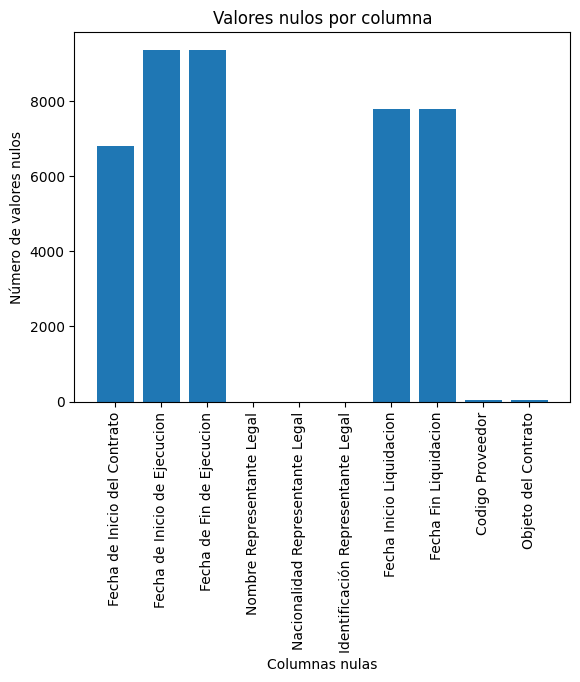

In [75]:
import matplotlib.pyplot as plt

# Generar los datos de la gráfica
null_cols = dfnulls['Null_cols']
num_null_cols = dfnulls['Num_null_cols']

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el diagrama de barras
ax.bar(null_cols, num_null_cols)

# Agregar etiquetas y títulos
ax.set_xlabel('Columnas nulas')
ax.set_ylabel('Número de valores nulos')
ax.set_title('Valores nulos por columna')

# Establecer los ticks y las etiquetas del eje x
ax.set_xticks(range(len(null_cols)))
ax.set_xticklabels(null_cols, rotation=90)

# Mostrar la gráfica
plt.show()

In [76]:
df.dropna(subset = null_cols, axis=0)
df

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Fecha Inicio Liquidacion,Fecha Fin Liquidacion,Codigo Proveedor,Objeto del Contrato
0,MUNICIPIO DE CARTAGO,891900493,VALLE DEL CAUCA,CARTAGO,"COLOMBIA, VALLE DEL CAUCA , CARTAGO",TERRITORIAL,NO APLICA/NO PERTENECE,EJECUTIVO,CENTRALIZADA,CO1.BDOS.4333130,...,0,650000.0,0,0.0,04/25/2023 12:00:00 AM,704960004,NaT,NaT,716907704.0,PRESTAR LOS SERVICIOS COMO MONITOR DE FÚTBOL D...
1,DIRECCION DE TRANSITO DE BUCARAMANGA,890204109,SANTANDER,BUCARAMANGA,"COLOMBIA, SANTANDER , BUCARAMANGA",TERRITORIAL,TRANSPORTE,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4283671,...,0,5020610.0,0,0.0,04/27/2023 12:00:00 AM,700712011,2023-12-04 17:00:00,2024-04-04 17:00:00,700636053.0,SUMINISTRO DE CERTIFICADOS DIGITALES PARA INTE...
2,SENA REGIONAL CAQUETA,899999034,CAQUETÁ,NO DEFINIDO,"COLOMBIA, CAQUETÁ",NACIONAL,TRABAJO,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4332033,...,0,49804749.0,0,0.0,04/26/2023 12:00:00 AM,704160886,2024-01-01 13:00:00,2024-05-01 04:59:00,703545509.0,PRESTAR SERVICIOS PROFESIONALES PARA LA GESTIÓ...
3,MUNICIPIO DE SOACHA,800094755,CUNDINAMARCA,SOACHA,"COLOMBIA, CUNDINAMARCA , SOACHA",TERRITORIAL,"VIVIENDA, CIUDAD Y TERRITORIO",EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4312653,...,0,0.0,0,10800000.0,04/25/2023 12:00:00 AM,702158254,NaT,NaT,715471561.0,PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
4,ESE CLINICA MATERNIDAD RAFAEL CALVO C,806001061,BOLÍVAR,CARTAGENA,"COLOMBIA, BOLÍVAR , CARTAGENA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4318518,...,0,3427200.0,0,0.0,04/26/2023 12:00:00 AM,704441476,NaT,NaT,721321339.0,SUMINISTRO DE DISPENSADOR DE AGUA PLANTA DE OZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN RAFAEL ...,899999151,CUNDINAMARCA,FACATATIVÁ,"COLOMBIA, CUNDINAMARCA , FACATATIVÁ",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4348873,...,0,11310000.0,0,0.0,05/01/2023 12:00:00 AM,703019919,NaT,NaT,721730463.0,PRESTACIÓN DE SERVICIOS DE AUXILIAR ADMINISTRA...
9365,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN JUAN DE...,890501019,NORTE DE SANTANDER,PAMPLONA,"COLOMBIA, NORTE DE SANTANDER , PAMPLONA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4314445,...,0,0.0,0,239960000.0,05/01/2023 12:00:00 AM,700733116,NaT,NaT,717930010.0,PRESTACIÓN DE SERVICIOS DE FACTURACION REVISOR...
9366,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4352990,...,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,NaT,NaT,708721543.0,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9367,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4353601,...,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,NaT,NaT,710000407.0,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...


Para eliminar las columnas que tienen valores nulos, puedes usar el método `dropna()` con el parámetro `axis=1`. Este método eliminará todas las columnas que contengan al menos un valor nulo.

In [77]:
# Supongamos que tu DataFrame se llama df
df_sin_nulos = df.dropna(axis=1)
df_sin_nulos

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Tipo de Identificación Representante Legal,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad
0,MUNICIPIO DE CARTAGO,891900493,VALLE DEL CAUCA,CARTAGO,"COLOMBIA, VALLE DEL CAUCA , CARTAGO",TERRITORIAL,NO APLICA/NO PERTENECE,EJECUTIVO,CENTRALIZADA,CO1.BDOS.4333130,...,CÉDULA DE CIUDADANÍA,HOMBRE,0.0,15500000,0,650000.0,0,0.0,04/25/2023 12:00:00 AM,704960004
1,DIRECCION DE TRANSITO DE BUCARAMANGA,890204109,SANTANDER,BUCARAMANGA,"COLOMBIA, SANTANDER , BUCARAMANGA",TERRITORIAL,TRANSPORTE,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4283671,...,SIN DESCRIPCION,NO DEFINIDO,0.0,0,0,5020610.0,0,0.0,04/27/2023 12:00:00 AM,700712011
2,SENA REGIONAL CAQUETA,899999034,CAQUETÁ,NO DEFINIDO,"COLOMBIA, CAQUETÁ",NACIONAL,TRABAJO,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4332033,...,SIN DESCRIPCION,NO DEFINIDO,0.0,0,0,49804749.0,0,0.0,04/26/2023 12:00:00 AM,704160886
3,MUNICIPIO DE SOACHA,800094755,CUNDINAMARCA,SOACHA,"COLOMBIA, CUNDINAMARCA , SOACHA",TERRITORIAL,"VIVIENDA, CIUDAD Y TERRITORIO",EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4312653,...,CÉDULA DE CIUDADANÍA,MUJER,0.0,0,0,0.0,0,10800000.0,04/25/2023 12:00:00 AM,702158254
4,ESE CLINICA MATERNIDAD RAFAEL CALVO C,806001061,BOLÍVAR,CARTAGENA,"COLOMBIA, BOLÍVAR , CARTAGENA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4318518,...,CÉDULA DE CIUDADANÍA,MUJER,0.0,0,0,3427200.0,0,0.0,04/26/2023 12:00:00 AM,704441476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN RAFAEL ...,899999151,CUNDINAMARCA,FACATATIVÁ,"COLOMBIA, CUNDINAMARCA , FACATATIVÁ",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4348873,...,CÉDULA DE CIUDADANÍA,MUJER,0.0,0,0,11310000.0,0,0.0,05/01/2023 12:00:00 AM,703019919
9365,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN JUAN DE...,890501019,NORTE DE SANTANDER,PAMPLONA,"COLOMBIA, NORTE DE SANTANDER , PAMPLONA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4314445,...,CÉDULA DE CIUDADANÍA,HOMBRE,0.0,0,0,0.0,0,239960000.0,05/01/2023 12:00:00 AM,700733116
9366,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4352990,...,SIN DESCRIPCION,NO DEFINIDO,105000000.0,0,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384
9367,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4353601,...,SIN DESCRIPCION,NO DEFINIDO,96000000.0,0,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384


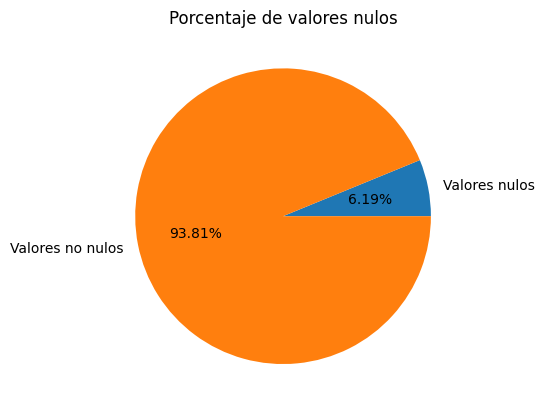

In [78]:
import matplotlib.pyplot as plt

# Calcular el número total de valores nulos en el DataFrame
total_null = df.isnull().sum().sum()

total_not_null = df.size - total_null

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el diagrama de torta
ax.pie([total_null, 
        total_not_null], 
       labels=['Valores nulos',
               'Valores no nulos'], 
       autopct='%1.2f%%')

ax.set_title('Porcentaje de valores nulos')

plt.show()

Esta tambien la alternativa quitar las filas que son las fechas

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Nombre Entidad                                                      9369 non-null   object        
 1   Nit Entidad                                                         9369 non-null   int64         
 2   Departamento                                                        9369 non-null   object        
 3   Ciudad                                                              9369 non-null   object        
 4   Localización                                                        9369 non-null   object        
 5   Orden                                                               9369 non-null   object        
 6   Sector                                                  

In [80]:
list(null_cols)

['Fecha de Inicio del Contrato',
 'Fecha de Inicio de Ejecucion',
 'Fecha de Fin de Ejecucion',
 'Nombre Representante Legal',
 'Nacionalidad Representante Legal',
 'Identificación Representante Legal',
 'Fecha Inicio Liquidacion',
 'Fecha Fin Liquidacion',
 'Codigo Proveedor',
 'Objeto del Contrato']

In [81]:
df2=df.drop(list(null_cols),axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 61 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Nombre Entidad                                                      9369 non-null   object        
 1   Nit Entidad                                                         9369 non-null   int64         
 2   Departamento                                                        9369 non-null   object        
 3   Ciudad                                                              9369 non-null   object        
 4   Localización                                                        9369 non-null   object        
 5   Orden                                                               9369 non-null   object        
 6   Sector                                                  

## **Actividad 4**

Calcular alguna cantidad de interés en una nueva columna.

### **Desarrollo** 

Vamos a revisar el tiempo de ejecución del contrato que lleva hasta el día $30$ de abril del $2023$ que fue tomada la información  


In [82]:
df2['Dias de ejecución del contrato']=df2['Fecha de Fin del Contrato']-datetime.strptime("2023-04-30", 
                                                                                         "%Y-%m-%d")
df2

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Dias de ejecución del contrato
0,MUNICIPIO DE CARTAGO,891900493,VALLE DEL CAUCA,CARTAGO,"COLOMBIA, VALLE DEL CAUCA , CARTAGO",TERRITORIAL,NO APLICA/NO PERTENECE,EJECUTIVO,CENTRALIZADA,CO1.BDOS.4333130,...,HOMBRE,0.0,15500000,0,650000.0,0,0.0,04/25/2023 12:00:00 AM,704960004,244 days
1,DIRECCION DE TRANSITO DE BUCARAMANGA,890204109,SANTANDER,BUCARAMANGA,"COLOMBIA, SANTANDER , BUCARAMANGA",TERRITORIAL,TRANSPORTE,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4283671,...,NO DEFINIDO,0.0,0,0,5020610.0,0,0.0,04/27/2023 12:00:00 AM,700712011,214 days
2,SENA REGIONAL CAQUETA,899999034,CAQUETÁ,NO DEFINIDO,"COLOMBIA, CAQUETÁ",NACIONAL,TRABAJO,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4332033,...,NO DEFINIDO,0.0,0,0,49804749.0,0,0.0,04/26/2023 12:00:00 AM,704160886,245 days
3,MUNICIPIO DE SOACHA,800094755,CUNDINAMARCA,SOACHA,"COLOMBIA, CUNDINAMARCA , SOACHA",TERRITORIAL,"VIVIENDA, CIUDAD Y TERRITORIO",EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4312653,...,MUJER,0.0,0,0,0.0,0,10800000.0,04/25/2023 12:00:00 AM,702158254,112 days
4,ESE CLINICA MATERNIDAD RAFAEL CALVO C,806001061,BOLÍVAR,CARTAGENA,"COLOMBIA, BOLÍVAR , CARTAGENA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4318518,...,MUJER,0.0,0,0,3427200.0,0,0.0,04/26/2023 12:00:00 AM,704441476,20 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN RAFAEL ...,899999151,CUNDINAMARCA,FACATATIVÁ,"COLOMBIA, CUNDINAMARCA , FACATATIVÁ",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4348873,...,MUJER,0.0,0,0,11310000.0,0,0.0,05/01/2023 12:00:00 AM,703019919,185 days
9365,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN JUAN DE...,890501019,NORTE DE SANTANDER,PAMPLONA,"COLOMBIA, NORTE DE SANTANDER , PAMPLONA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4314445,...,HOMBRE,0.0,0,0,0.0,0,239960000.0,05/01/2023 12:00:00 AM,700733116,61 days
9366,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4352990,...,NO DEFINIDO,105000000.0,0,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,242 days
9367,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4353601,...,NO DEFINIDO,96000000.0,0,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,242 days


## **Actividad 5**

Genere nuevos DataFrames agrupando datos seg´un características de interés, tango
usando `.groupby()` como filtros. Una dos de los DataFrames generados por filtro y
agrupamiento, inteprete cuidadosamente los datos obtenidos.

De las columnas que tenemos de nuestro `dataframe`, una información de interés es saber que día de los registrados contratan más el estado 

In [83]:
df2['Fecha de Firma'].value_counts()

2023-04-28    2738
2023-04-25    2170
2023-04-27    2130
2023-04-26    2029
2023-04-29     200
2023-04-30     102
Name: Fecha de Firma, dtype: int64

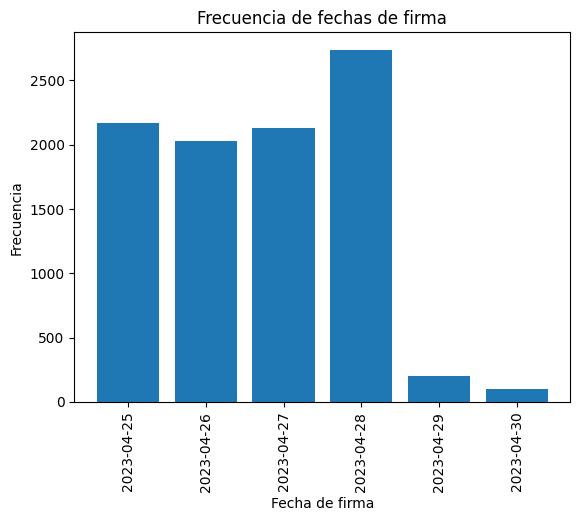

In [84]:
import matplotlib.pyplot as plt

# Obtener los valores a graficar
valores = df['Fecha de Firma'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el diagrama de barras
ax.bar(valores.index, valores.values)

# Agregar etiquetas y títulos
ax.set_xlabel('Fecha de firma')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de fechas de firma')

# Rotar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()

### **Desarrollo 5**

En filtros vamos a considerar la variable Pyme, y lo agruparemos por departamento, esto con la finalidad de determinar el top $5$ de departamentos de Colombia con mayor contratación de `Pymes`: 

No esta mal que aclaremos la variable
* `Es Pyme` : significa "Pequeña y Mediana Empresa". Es una categoría empresarial que se utiliza para hacer referencia a empresas que tienen una cantidad limitada de empleados y generan ingresos anuales también limitados en comparación con las grandes empresas.
* `Departamento`



In [85]:
dfpymes=df2[df2['Es Pyme']=='SI'].groupby('Departamento')['Nombre Entidad'].count().sort_values(ascending=False)[0:5]
dfpymes

Departamento
DISTRITO CAPITAL DE BOGOTÁ    374
ANTIOQUIA                     178
VALLE DEL CAUCA               119
SANTANDER                     109
CUNDINAMARCA                   84
Name: Nombre Entidad, dtype: int64

### **Actividad 6**

Graficar variables numéricas matizando según variables categóricas (`hue`).


Una posible visualización sería un scatterplot que muestre el valor del contrato y los departamentos involucrados, matizando por la columna "`Es Pyme`".

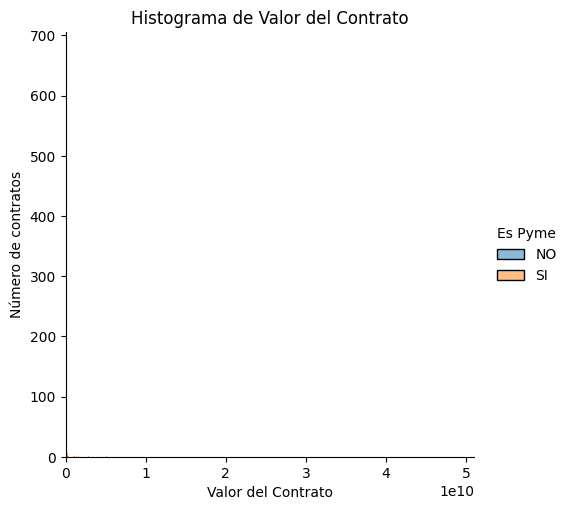

In [109]:
sns.displot(data=df2, 
            x='Valor del Contrato', 
            hue='Es Pyme', 
            kind="hist")


plt.xlabel('Valor del Contrato')
plt.ylabel('Número de contratos')
plt.title('Histograma de Valor del Contrato')
plt.xlim(df2['Valor del Contrato'].min(), 
         df2['Valor del Contrato'].max())
plt.show()

* Si queremos agregar más información a la visualización, podemos usar el parámetro size para indicar el tamaño de los puntos en función de alguna variable numérica, como por ejemplo el valor facturado:




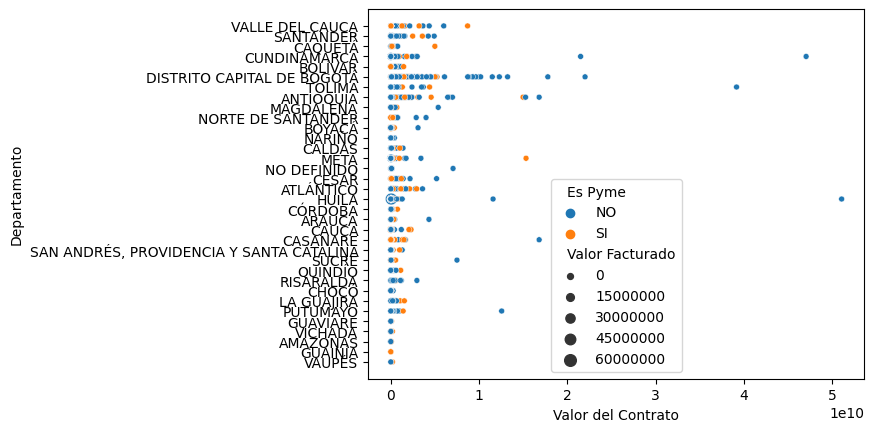

In [108]:
sns.scatterplot(data=df2, 
                x='Valor del Contrato', 
                y='Departamento', 
                hue='Es Pyme', 
                size='Valor Facturado', 
                )
plt.show()

## **Actividad 7**

Construir tablas pivote y hacer gráficas de calor de las mismas.

In [101]:
df2.pivot( columns='Es Pyme', 
          values='Valor del Contrato').sort_values(by='SI', 
                                                   ascending=False)[0:5]

Es Pyme,NO,SI
7666,NaN,1.531962e+10
4136,NaN,1.497843e+10
2232,NaN,8.702010e+09
1694,NaN,5.247762e+09
6683,NaN,5.022548e+09


In [106]:
df2.iloc[[7666, 4136, 2232, 1694, 6683]]['Departamento']

7666                          META
4136                     ANTIOQUIA
2232               VALLE DEL CAUCA
1694    DISTRITO CAPITAL DE BOGOTÁ
6683    DISTRITO CAPITAL DE BOGOTÁ
Name: Departamento, dtype: object

Se creará una gráfica de calor que muestra la cantidad de contratos por departamento y tipo de empresa, utilizando los datos de la columna '`Valor del Contrato`' para contar la cantidad de contratos. 

La gráfica tendrá una escala de colores de azul a rojo, donde el azul indica un menor número de contratos y el rojo indica un mayor número de contratos.

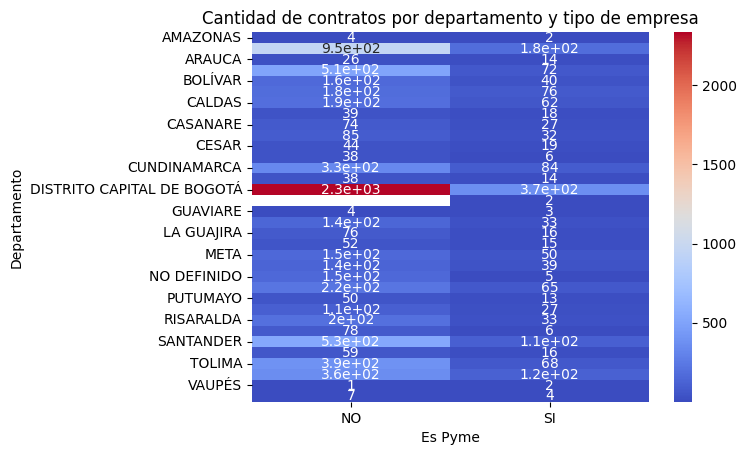

In [98]:
tabla_pivote = df2.pivot_table(columns='Es Pyme',
                               index='Departamento',
                               values='Valor del Contrato',
                               aggfunc='count')

# Graficar tabla pivote como gráfico de calor
sns.heatmap(data=tabla_pivote,
            cmap='coolwarm',
            annot=True,
            #fmt='D'
            )

plt.title('Cantidad de contratos por departamento y tipo de empresa')
plt.xlabel('Es Pyme')
plt.ylabel('Departamento')
plt.show()

## **Actividad 8**

Hacer al menos dos gráficas con datos categóricos.

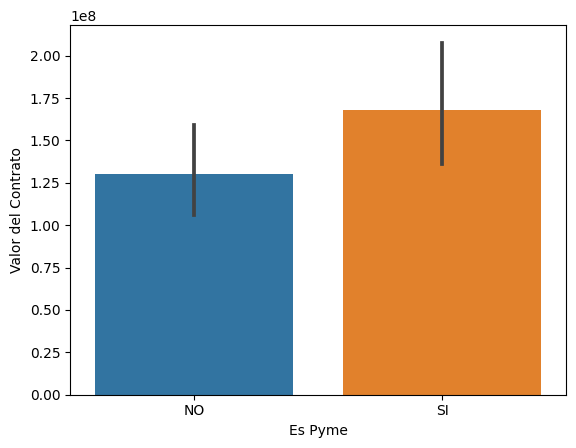

In [112]:
sns.barplot(data=df2, 
            x='Es Pyme',
            y='Valor del Contrato' 
            )
plt.show()

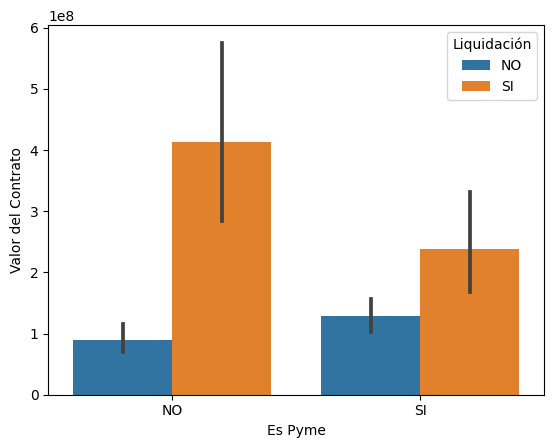

In [118]:
sns.barplot(data=df2, 
            x='Es Pyme',
            y='Valor del Contrato',
            hue='Liquidación' 
            )
plt.show()

## **Actividad 9**

Graficar y analizar la correlación de las variables numéricas del DataSet.

In [125]:
dfnumeric2 = df2.select_dtypes(include='number')
dfnumeric2

,Nit Entidad,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Ejecucion,Saldo CDP,Dias Adicionados,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos Propios,Codigo Entidad,Dias de ejecución del contrato
0,891900493,16150000.0,0.0,0.0,16150000.0,0.0,0,16150000.0,0.0,0,0.0,15500000,0,650000.0,0.0,704960004,244 days
1,890204109,5020610.0,0.0,0.0,5020610.0,0.0,0,5020610.0,12376833.0,0,0.0,0,0,5020610.0,0.0,700712011,214 days
2,899999034,49804749.0,0.0,0.0,49804749.0,0.0,0,49804749.0,63703750.0,0,0.0,0,0,49804749.0,0.0,704160886,245 days
3,800094755,10800000.0,0.0,0.0,10800000.0,0.0,0,10800000.0,0.0,0,0.0,0,0,0.0,10800000.0,702158254,112 days
4,806001061,3427200.0,0.0,0.0,3427200.0,0.0,0,3427200.0,4528600.0,0,0.0,0,0,3427200.0,0.0,704441476,20 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,899999151,11310000.0,0.0,0.0,11310000.0,0.0,0,11310000.0,11310000.0,0,0.0,0,0,11310000.0,0.0,703019919,185 days
9365,890501019,239960000.0,0.0,0.0,239960000.0,0.0,0,239960000.0,239960000.0,0,0.0,0,0,0.0,239960000.0,700733116,61 days
9366,800186061,105000000.0,0.0,0.0,105000000.0,0.0,0,105000000.0,0.0,0,105000000.0,0,0,0.0,0.0,702541384,242 days
9367,800186061,96000000.0,0.0,0.0,96000000.0,0.0,0,96000000.0,0.0,0,96000000.0,0,0,0.0,0.0,702541384,242 days


In [132]:
dfnumeric3 = df2[dfnumeric]
dfnumeric3

,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos Propios,Presupuesto General de la Nacion – PGN,Valor Pendiente de Ejecucion,Saldo CDP
0,16150000.0,0.0,0.0,16150000.0,0.0,650000.0,0.0,0.0,16150000.0,0.0
1,5020610.0,0.0,0.0,5020610.0,0.0,5020610.0,0.0,0.0,5020610.0,12376833.0
2,49804749.0,0.0,0.0,49804749.0,0.0,49804749.0,0.0,0.0,49804749.0,63703750.0
3,10800000.0,0.0,0.0,10800000.0,0.0,0.0,10800000.0,0.0,10800000.0,0.0
4,3427200.0,0.0,0.0,3427200.0,0.0,3427200.0,0.0,0.0,3427200.0,4528600.0
...,...,...,...,...,...,...,...,...,...,...
9364,11310000.0,0.0,0.0,11310000.0,0.0,11310000.0,0.0,0.0,11310000.0,11310000.0
9365,239960000.0,0.0,0.0,239960000.0,0.0,0.0,239960000.0,0.0,239960000.0,239960000.0
9366,105000000.0,0.0,0.0,105000000.0,0.0,0.0,0.0,105000000.0,105000000.0,0.0
9367,96000000.0,0.0,0.0,96000000.0,0.0,0.0,0.0,96000000.0,96000000.0,0.0


In [133]:
dfnumeric3.corr()

,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos Propios,Presupuesto General de la Nacion – PGN,Valor Pendiente de Ejecucion,Saldo CDP
Valor del Contrato,1.000000,0.029154,-0.002336,1.000000,-0.001242,0.811319,0.308389,0.584218,1.000000,0.178784
Valor de pago adelantado,0.029154,1.000000,-0.000518,0.029154,-0.000317,0.002756,0.006316,0.049100,0.029154,-0.003381
Valor Facturado,-0.002336,-0.000518,1.000000,-0.002712,0.861075,-0.000946,-0.001727,-0.001925,-0.002337,-0.004613
Valor Pendiente de Pago,1.000000,0.029154,-0.002712,1.000000,-0.001679,0.811319,0.308389,0.584218,1.000000,0.178785
Valor Pagado,-0.001242,-0.000317,0.861075,-0.001679,1.000000,-0.000409,-0.000783,-0.001180,-0.001244,-0.003118
"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",0.811319,0.002756,-0.000946,0.811319,-0.000409,1.000000,-0.001134,0.150008,0.811319,0.121737
Recursos Propios,0.308389,0.006316,-0.001727,0.308389,-0.000783,-0.001134,1.000000,0.000564,0.308389,0.046374
Presupuesto General de la Nacion – PGN,0.584218,0.049100,-0.001925,0.584218,-0.001180,0.150008,0.000564,1.000000,0.584218,0.144562
Valor Pendiente de Ejecucion,1.000000,0.029154,-0.002337,1.000000,-0.001244,0.811319,0.308389,0.584218,1.000000,0.178784
Saldo CDP,0.178784,-0.003381,-0.004613,0.178785,-0.003118,0.121737,0.046374,0.144562,0.178784,1.000000


El método `diverging_palette()` de Seaborn crea una paleta de colores divergente con los parámetros $220$ y $20$, que establecen los colores de inicio y finalización de la paleta.

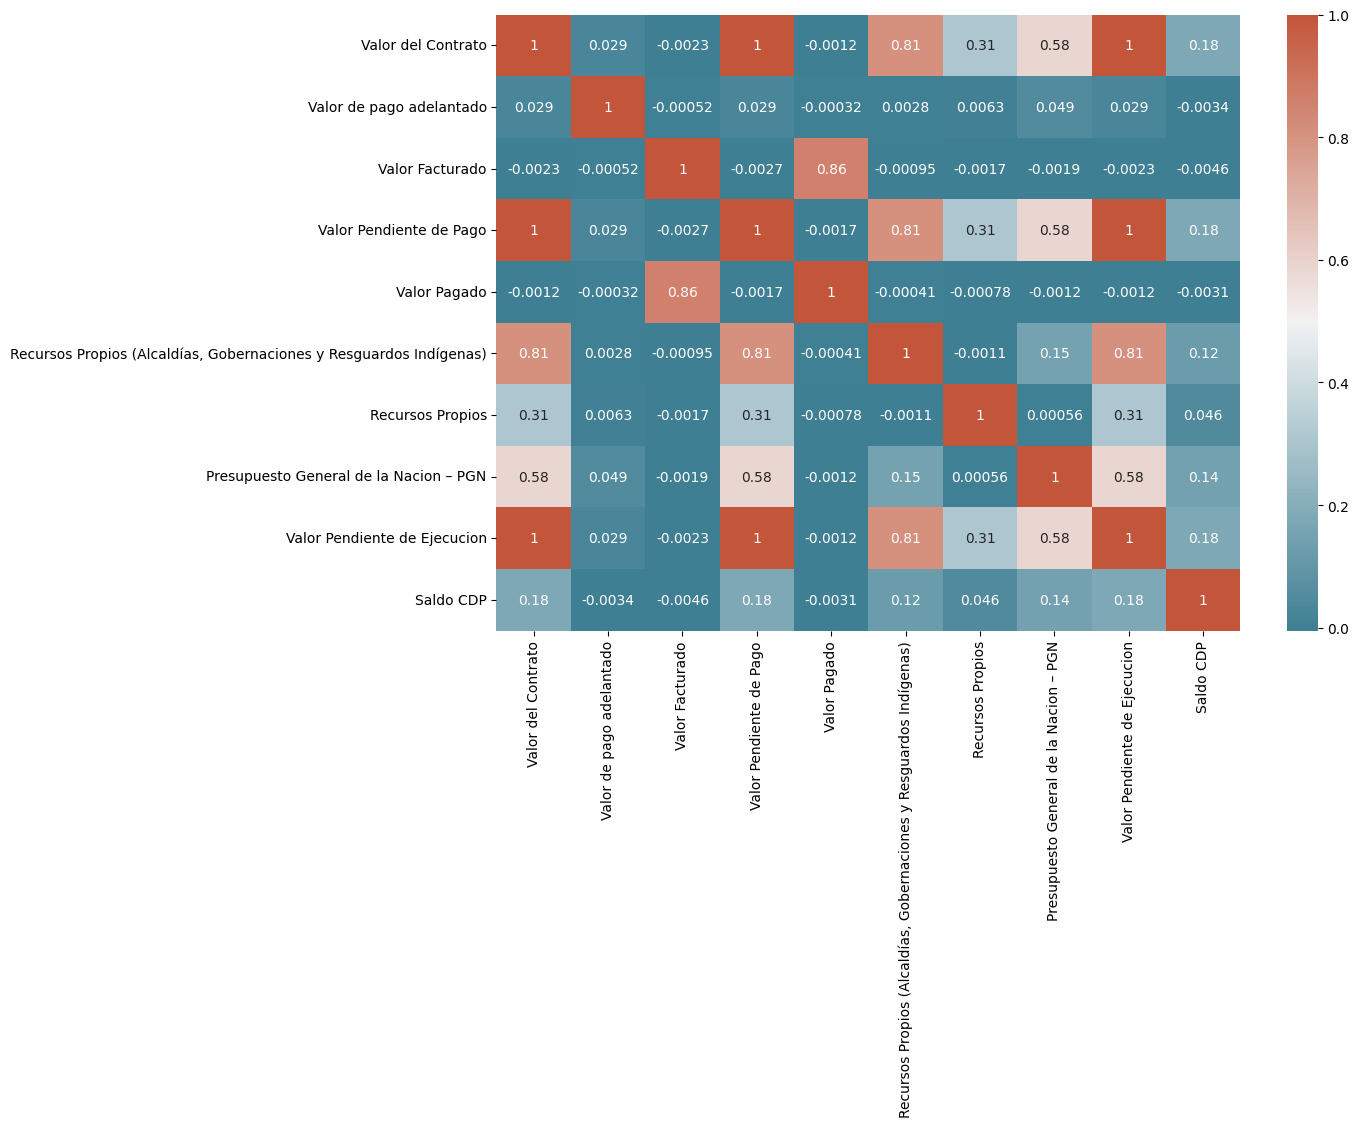

In [144]:
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 
                             20, 
                             as_cmap=True)
sns.heatmap(dfnumeric3.corr(), 
            cmap = cmap, 
            annot = True)
plt.show()

In [139]:
import plotly.express as px

In [141]:
## Regresión simple, recta de ajuste por OLS.
fig = px.scatter(dfnumeric3, 
                 x = dfnumeric3['Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)'], 
                 y = dfnumeric3['Valor del Contrato'], 
                 template = "plotly_white",
                 title = "Recta de ajuste por OLS", 
                 trendline="ols", 
                 trendline_color_override="yellow")
fig.show()

In [145]:
## Regresión simple, recta de ajuste por OLS.
fig = px.scatter(dfnumeric3, 
                 x = dfnumeric3['Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)'], 
                 y = dfnumeric3['Valor Pendiente de Pago'], 
                 template = "plotly_white",
                 title = "Recta de ajuste por OLS", 
                 trendline="ols", 
                 trendline_color_override="yellow")
fig.show()

In [146]:
## Regresión simple, recta de ajuste por OLS.
fig = px.scatter(dfnumeric3, 
                 x = dfnumeric3['Valor Pendiente de Pago'], 
                 y = dfnumeric3['Valor del Contrato'], 
                 template = "plotly_white",
                 title = "Recta de ajuste por OLS", 
                 trendline="ols", 
                 trendline_color_override="yellow")
fig.show()

In [161]:
dfnumeric3['Es Pyme']=df2['Es Pyme']
dfnumeric3

<ipython-input-161-3895cdfcc827>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos Propios,Presupuesto General de la Nacion – PGN,Valor Pendiente de Ejecucion,Saldo CDP,Es Pyme
0,16150000.0,0.0,0.0,16150000.0,0.0,650000.0,0.0,0.0,16150000.0,0.0,NO
1,5020610.0,0.0,0.0,5020610.0,0.0,5020610.0,0.0,0.0,5020610.0,12376833.0,NO
2,49804749.0,0.0,0.0,49804749.0,0.0,49804749.0,0.0,0.0,49804749.0,63703750.0,NO
3,10800000.0,0.0,0.0,10800000.0,0.0,0.0,10800000.0,0.0,10800000.0,0.0,NO
4,3427200.0,0.0,0.0,3427200.0,0.0,3427200.0,0.0,0.0,3427200.0,4528600.0,NO
...,...,...,...,...,...,...,...,...,...,...,...
9364,11310000.0,0.0,0.0,11310000.0,0.0,11310000.0,0.0,0.0,11310000.0,11310000.0,NO
9365,239960000.0,0.0,0.0,239960000.0,0.0,0.0,239960000.0,0.0,239960000.0,239960000.0,SI
9366,105000000.0,0.0,0.0,105000000.0,0.0,0.0,0.0,105000000.0,105000000.0,0.0,NO
9367,96000000.0,0.0,0.0,96000000.0,0.0,0.0,0.0,96000000.0,96000000.0,0.0,NO


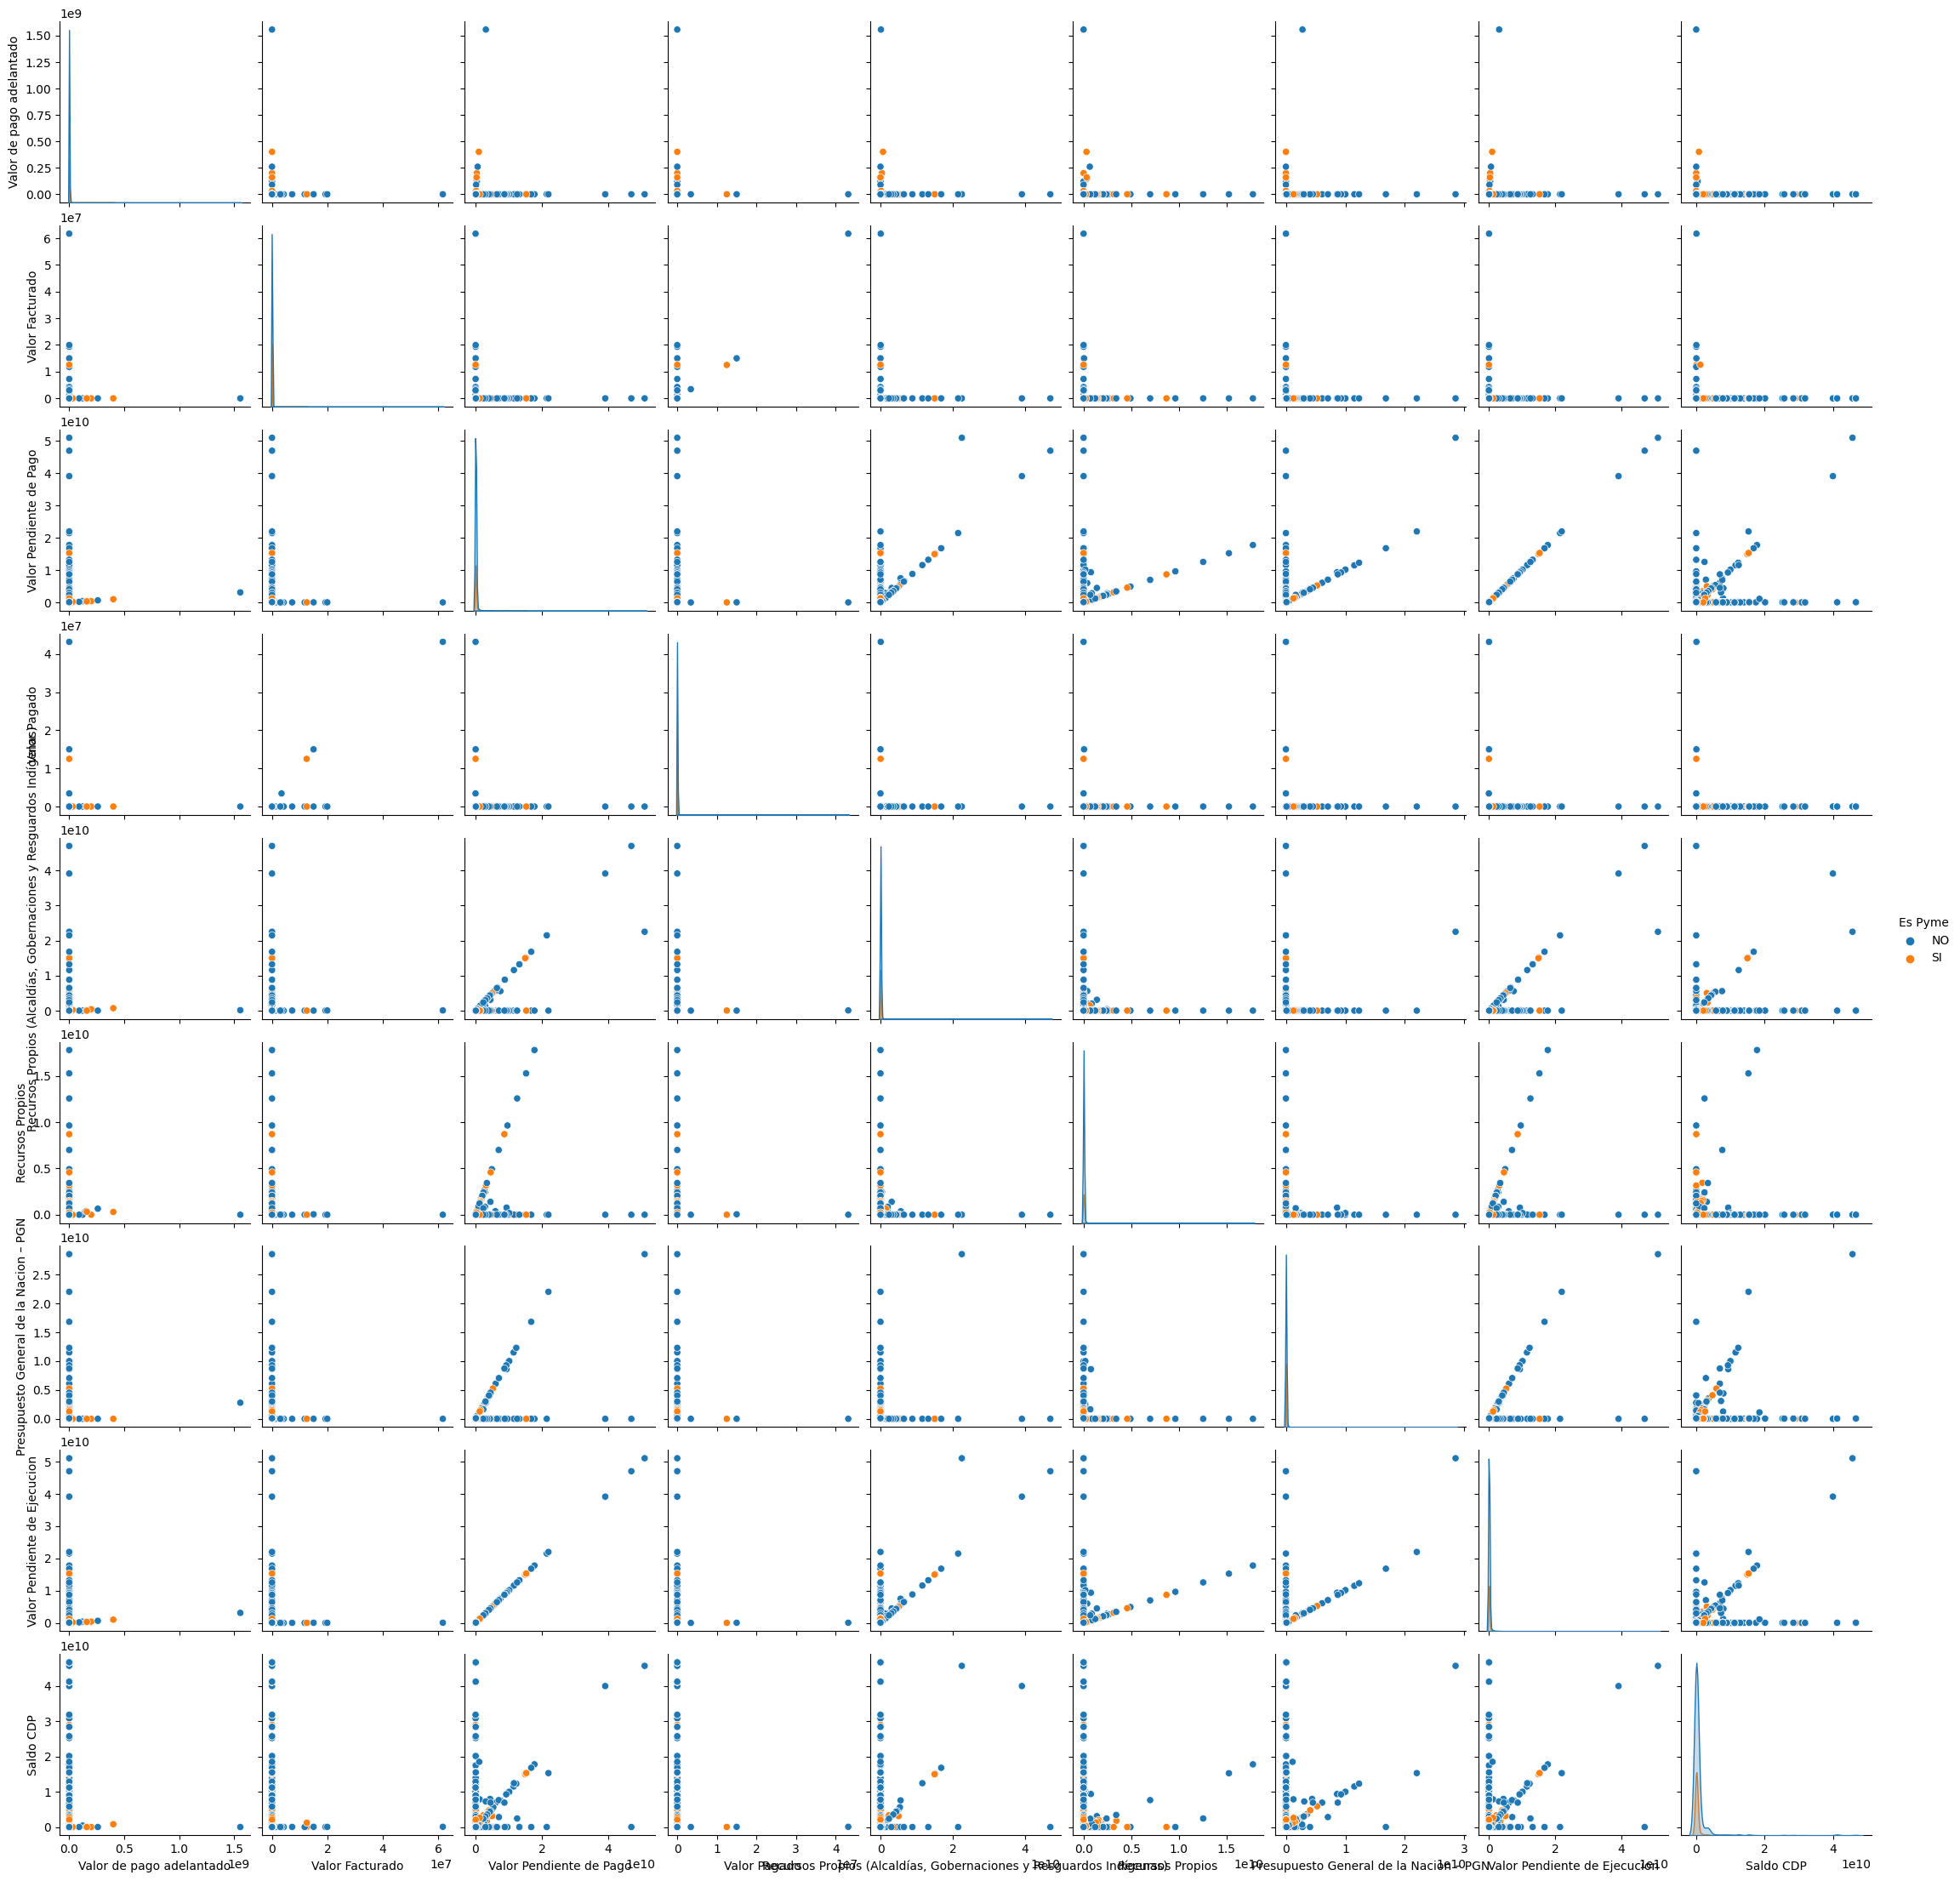

In [163]:
sns.pairplot(dfnumeric3[dfnumeric3.columns[1:]], 
             hue = "Es Pyme")
plt.show()

## **Actividad 10**

Use expresiones regulares (`ˆ` `,`  `.` `*` `$` , etc. ) para filtrar dependiendo contenidos de texto y grafique los resultados obtenidos.

In [171]:
df['Objeto del Contrato']

0       PRESTAR LOS SERVICIOS COMO MONITOR DE FÚTBOL D...
1       SUMINISTRO DE CERTIFICADOS DIGITALES PARA INTE...
2       PRESTAR SERVICIOS PROFESIONALES PARA LA GESTIÓ...
3       PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
4       SUMINISTRO DE DISPENSADOR DE AGUA PLANTA DE OZ...
                              ...                        
9364    PRESTACIÓN DE SERVICIOS DE AUXILIAR ADMINISTRA...
9365    PRESTACIÓN DE SERVICIOS DE FACTURACION REVISOR...
9366    PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9367    PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9368    PRESTACIÓN DE SERVICIOS PROFESIONALES PARA ASE...
Name: Objeto del Contrato, Length: 9369, dtype: object

In [152]:
import re

Esta expresión filtrará solo las filas donde la columna "`Objeto del Contrato`" no es nula (`notnull()`) y además contienen la letra "`S`" (`str.contains("S")`). De esta manera, se evitará el error que puede ocurrir al aplicar el método `.str.contains()` a valores nulos o vacíos.






In [174]:
df.loc[df['Objeto del Contrato'].notnull() 
& df['Objeto del Contrato'].str.contains("SERVICIOS")]

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Fecha Inicio Liquidacion,Fecha Fin Liquidacion,Codigo Proveedor,Objeto del Contrato
0,MUNICIPIO DE CARTAGO,891900493,VALLE DEL CAUCA,CARTAGO,"COLOMBIA, VALLE DEL CAUCA , CARTAGO",TERRITORIAL,NO APLICA/NO PERTENECE,EJECUTIVO,CENTRALIZADA,CO1.BDOS.4333130,...,0,650000.0,0,0.0,04/25/2023 12:00:00 AM,704960004,NaT,NaT,716907704.0,PRESTAR LOS SERVICIOS COMO MONITOR DE FÚTBOL D...
2,SENA REGIONAL CAQUETA,899999034,CAQUETÁ,NO DEFINIDO,"COLOMBIA, CAQUETÁ",NACIONAL,TRABAJO,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4332033,...,0,49804749.0,0,0.0,04/26/2023 12:00:00 AM,704160886,2024-01-01 13:00:00,2024-05-01 04:59:00,703545509.0,PRESTAR SERVICIOS PROFESIONALES PARA LA GESTIÓ...
3,MUNICIPIO DE SOACHA,800094755,CUNDINAMARCA,SOACHA,"COLOMBIA, CUNDINAMARCA , SOACHA",TERRITORIAL,"VIVIENDA, CIUDAD Y TERRITORIO",EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4312653,...,0,0.0,0,10800000.0,04/25/2023 12:00:00 AM,702158254,NaT,NaT,715471561.0,PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
5,MUNICIPIO DE CARTAGO,891900493,VALLE DEL CAUCA,CARTAGO,"COLOMBIA, VALLE DEL CAUCA , CARTAGO",TERRITORIAL,NO APLICA/NO PERTENECE,EJECUTIVO,CENTRALIZADA,CO1.BDOS.4333149,...,0,0.0,0,0.0,04/25/2023 12:00:00 AM,704960004,NaT,NaT,713285385.0,PRESTAR LOS SERVICIOS COMO MONITOR DE NATACIÓN...
6,INSTITUTO DISTRITAL DE LAS ARTES,900413030,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,CULTURA,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4333102,...,0,44800000.0,0,0.0,04/28/2023 12:00:00 AM,702066127,NaT,NaT,703842344.0,PRESTAR SERVICIOS DE APOYO LA GESTIÓN DEL INST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN RAFAEL ...,899999151,CUNDINAMARCA,FACATATIVÁ,"COLOMBIA, CUNDINAMARCA , FACATATIVÁ",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,EJECUTIVO,DESCENTRALIZADA,CO1.BDOS.4348873,...,0,11310000.0,0,0.0,05/01/2023 12:00:00 AM,703019919,NaT,NaT,721730463.0,PRESTACIÓN DE SERVICIOS DE AUXILIAR ADMINISTRA...
9365,EMPRESA SOCIAL DEL ESTADO HOSPITAL SAN JUAN DE...,890501019,NORTE DE SANTANDER,PAMPLONA,"COLOMBIA, NORTE DE SANTANDER , PAMPLONA",TERRITORIAL,SALUD Y PROTECCIÓN SOCIAL,CORPORACIÓN AUTÓNOMA,DESCENTRALIZADA,CO1.BDOS.4314445,...,0,0.0,0,239960000.0,05/01/2023 12:00:00 AM,700733116,NaT,NaT,717930010.0,PRESTACIÓN DE SERVICIOS DE FACTURACION REVISOR...
9366,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4352990,...,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,NaT,NaT,708721543.0,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...
9367,DEFENSORÍA DEL PUEBLO,800186061,DISTRITO CAPITAL DE BOGOTÁ,BOGOTÁ,"COLOMBIA, BOGOTÁ, BOGOTÁ",NACIONAL,SERVICIO PÚBLICO,CORPORACIÓN AUTÓNOMA,CENTRALIZADA,CO1.BDOS.4353601,...,0,0.0,0,0.0,05/01/2023 12:00:00 AM,702541384,NaT,NaT,710000407.0,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA BRI...


In [184]:
df = df.dropna(subset=['Objeto del Contrato']) # eliminar filas con valores nulos en 'Objeto del Contrato'
df_servicios = df[df['Objeto del Contrato'].str.contains("SERVICIOS")] # filtrar los contratos que contienen la palabra "SERVICIOS"

<ipython-input-188-fe4f4944da5a>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



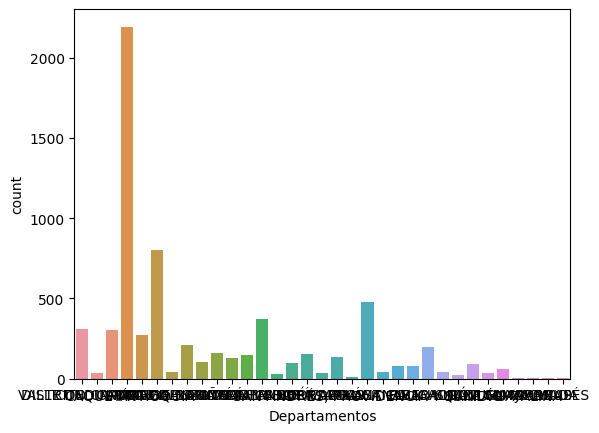

In [188]:
# hacer un gráfico de barras con el conteo de contratos por departamento
sns.countplot(x='Departamento', data=df_servicios)

# agregar leyenda para el eje x
plt.xlabel("Departamentos")
ax.set_xticklabels(df['Departamento'], rotation=0)
plt.show()